Regression Analysis on Ames Housing dataset(Boston Housing data)
1. EDA Analysis
    
    Data visualization
      
      Basic characteristics of the variables
      
      Univariate analysis
        Check missing data
        detect outliers
      Bivariate analysis
        Correlation analysis
        Heatmap
        Distribution(of the target variable)
        Scatterplot
2. Data preprocess
    
    Prep for regression
        Handling missing data/outlier
        Skewed data(data transformation)
        One-hot encoding
3. Data Modeling

        Linear Regression
        Ridge regression(L2 regularization)
        Lasso regression(L1)
        Random Forest
        Adaboost
        Gradient Boosting
4. Parameter Tuning
        choose the best Performance model to do gridsearch to search best hyper-parameter
5. Feature Engineering(more)

Thanks for Alexandru Papiu,Pedro Marcilino, Serigne from Kaggle

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from scipy.stats import norm, skew

In [2]:
# import train and test dataset into panda dataframes
train=pd.read_csv('/Users/taotao/Desktop/Python learning/houseprice/train.csv')
test=pd.read_csv('/Users/taotao/Desktop/Python learning/houseprice/test.csv')

data visualization

In [3]:
# take a look at the train dataset
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# take a look at the test dataset
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# check the data type of two datasets and drop unneccessary columns for further analysis
print(train.dtypes)
print(test.dtypes)
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


Here I am going to do more Exploratory Data Analysis using train dataset
Let's check the variables are highly correlated with sale price

In [6]:
# Check the top 20 variables highly correlated 
# Find correlations with the target and sort
correlations = train.corr()['SalePrice'].sort_values(ascending=True)

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 YearBuilt       0.522897
TotRmsAbvGrd    0.533723
FullBath        0.560664
1stFlrSF        0.605852
TotalBsmtSF     0.613581
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
OverallQual     0.790982
SalePrice       1.000000
Name: SalePrice, dtype: float64

Most Negative Correlations:
 KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
Name: SalePrice, dtype: float64


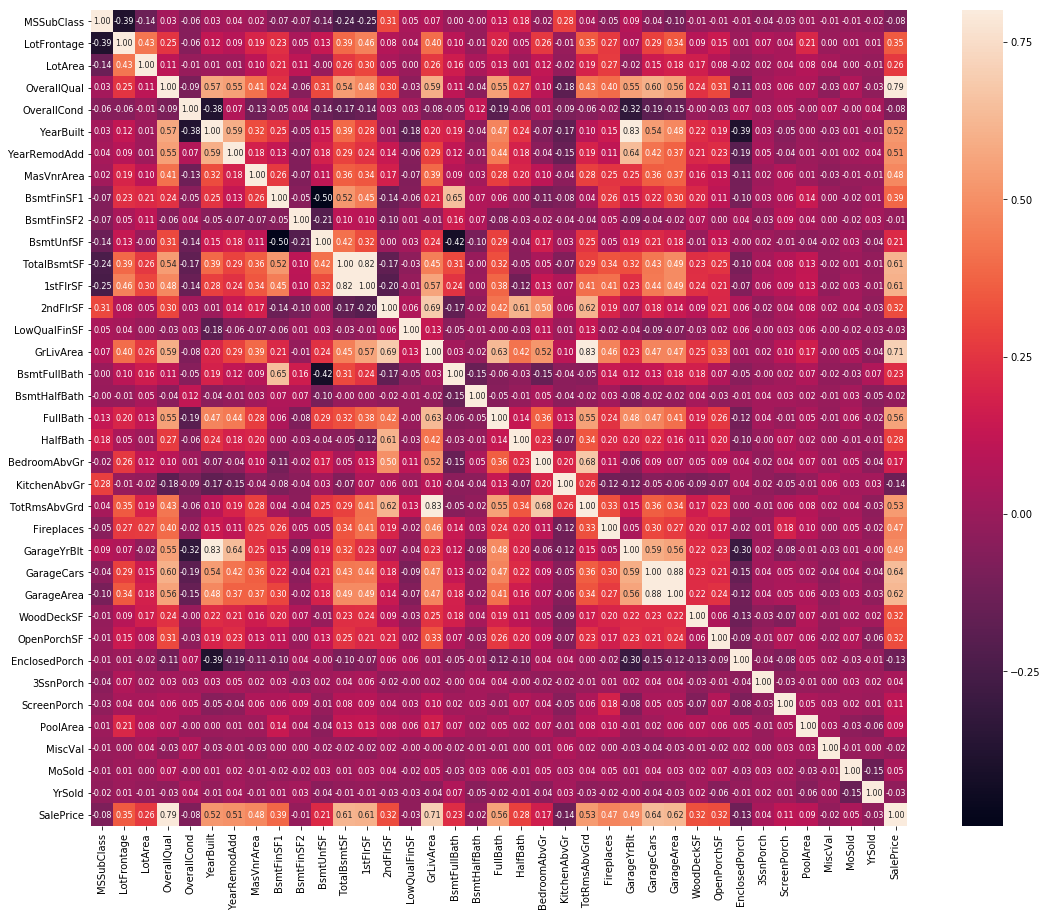

In [7]:
#Draw the heat map
corr_train = train.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr_train, vmax=0.8, annot=True, fmt='.2f', annot_kws={"size": 8},square=True)

From the analysis, 'OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF' has very high positive correlation with saleprice

<function matplotlib.pyplot.show(*args, **kw)>

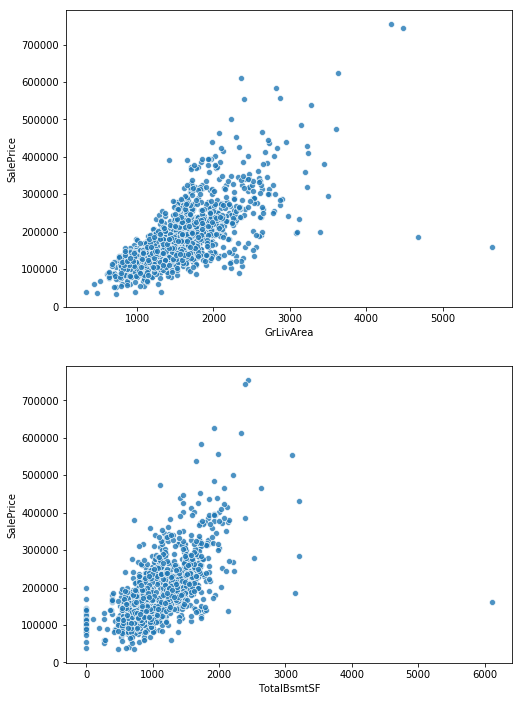

In [8]:
# scatter plot with numerical variables
# grlivarea/saleprice(linear relationship)
plt.figure(figsize=(8,12))
plt.subplot(211)
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train,alpha=0.8)
# TotalBsmtSF/saleprice(linear realtionship)
plt.subplot(212)
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=train,alpha=0.8)
plt.show

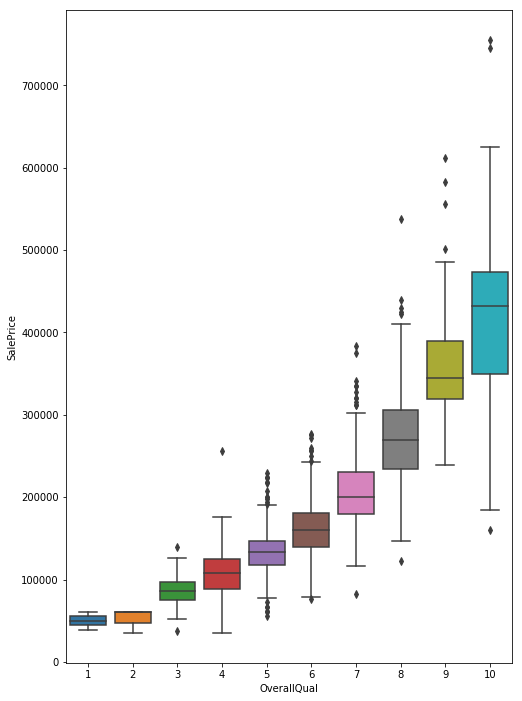

In [9]:
# relationship with categorical features
# box plot overallqual/sale price
plt.subplots(figsize=(8, 12))
sns.boxplot(x='OverallQual', y='SalePrice', data=train)

the higher the house quality is, the higher the sale price.(it absolutely make sense)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

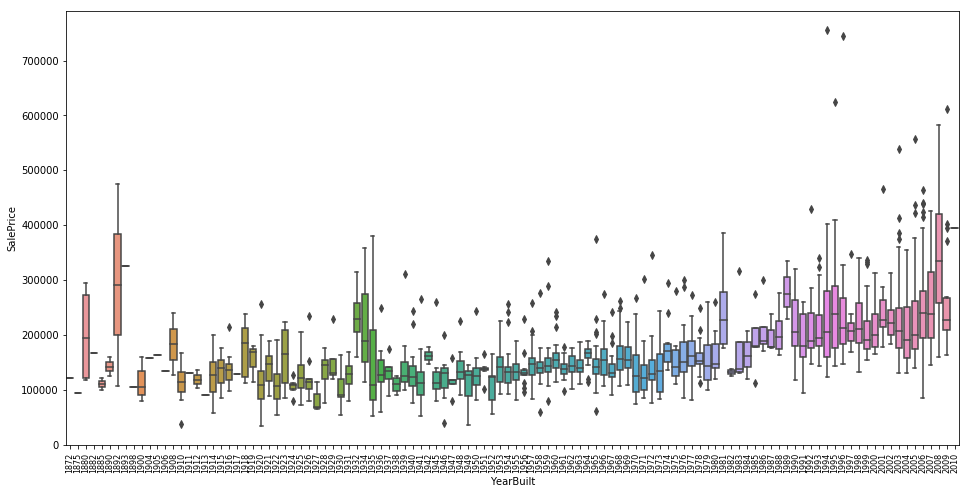

In [10]:
# box plot year built/sale price
plt.subplots(figsize=(16, 8))
sns.boxplot(x='YearBuilt', y='SalePrice', data=train)
plt.xticks(rotation=90,fontsize='8')

when the house is newer, the maximum price is higher

the median of house price voilated between 100000 and 300000

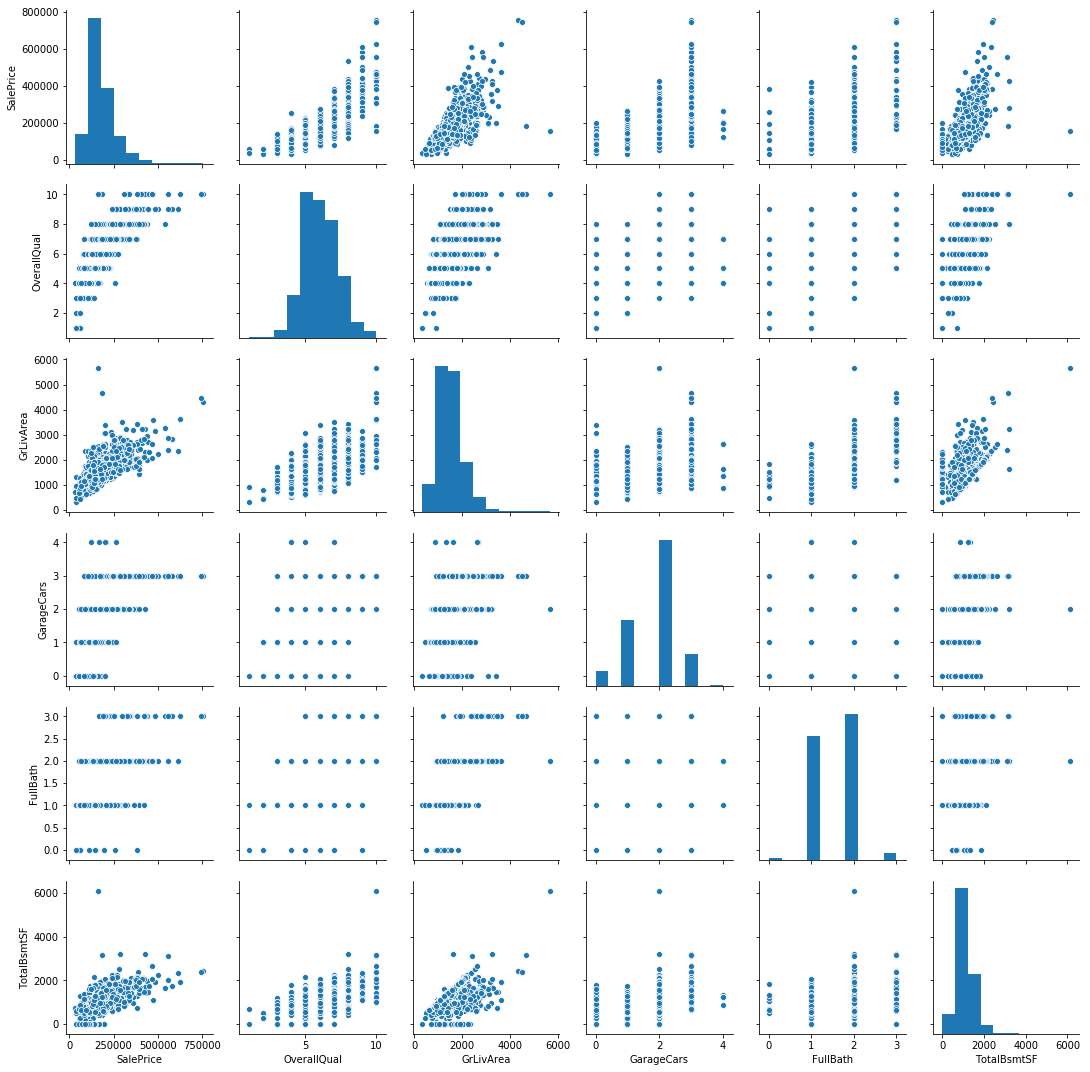

In [11]:
# Use price as dependent variable and others as independent variable, test the relationship between sales price
# and some important features
important=['SalePrice','OverallQual','GrLivArea','GarageCars','FullBath','TotalBsmtSF']
sns.pairplot(train[important])

the sales price represents an overall linear relationship 

data preprocess
1. delete outliers
from the analysis(scatter plot), there are obviously outliers(so let's delete the outliers)
2. handle missing data
different way handling missing data
3. deal with categorical features(one hot encoding)
4. skewed data
reason for transform skewed data :
for the later regression analysis: linear regression assumes 
  1. no multicollinearity 
  2. homoscedasticity
  3. Linearity
  4. Asence of correlated errors

In [12]:
# delete outliers
# from the scatter plot we could figure out the outlier points
indexnames=train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index
train.drop(indexnames,inplace=True)

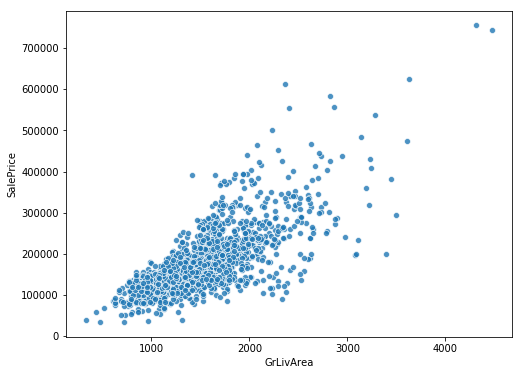

In [13]:
# check the scatter plot again
plt.figure(figsize=(8,6))
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train,alpha=0.8)
# the outlier is deleted successfully

In [14]:
# concatenate train and test data in one dataframe
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


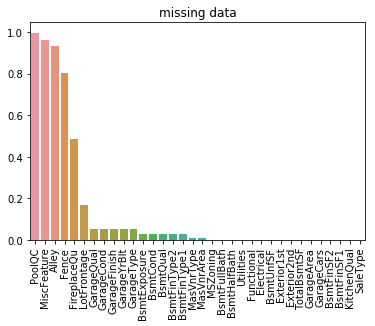

In [15]:
# check the missing data 
all_data_na=all_data.isnull().sum()/len(all_data)
all_data_na=all_data_na[all_data_na!=0].sort_values(ascending=False)
sns.barplot(x=all_data_na.index,y=all_data_na)
plt.xticks(rotation='90')
plt.title('missing data')
plt.show()

In [16]:
# Handling missing data
# since I want to handle all the missing data in both train dataset and test dataset, I merge the two dataset first
# understand the meaning of "NA" in each column
all_data_type=all_data.dtypes
all_data_na = all_data.isnull().sum()
na_ratio=(all_data.isnull().sum()*100/len(all_data))
missing_data=pd.DataFrame({'missing value':all_data_na,'missing ratio':na_ratio,'data type':all_data_type})
missing_data.loc[missing_data['missing value'] !=0].sort_values(by='missing value',ascending=False)

,missing value,missing ratio,data type
PoolQC,2908,99.691464,object
MiscFeature,2812,96.400411,object
Alley,2719,93.212204,object
Fence,2346,80.425094,object
FireplaceQu,1420,48.680151,object
LotFrontage,486,16.660953,float64
GarageCond,159,5.450806,object
GarageQual,159,5.450806,object
GarageYrBlt,159,5.450806,float64
GarageFinish,159,5.450806,object


In [17]:
# data with high percentage(>45%) of na data:PoolQC,MiscFeature,Alley,FireplaceQu,they are all categorical features
# the missing valuemeans no pool, no other features...we gonna keep those columns, they might help with further analysis
all_data['PoolQC']=all_data['PoolQC'].fillna('None')
all_data['MiscFeature']=all_data['MiscFeature'].fillna('None')
all_data['Alley']=all_data['Alley'].fillna('None')
all_data['Fence']=all_data['Fence'].fillna('None')
all_data['FireplaceQu']=all_data['FireplaceQu'].fillna('None')

In [18]:
# For other columns with missing data whose type are objects(categorical features)
# I just fill the 'missing value' with none or 0
## ???more efficient way doing this???
for col in ('GarageQual','GarageFinish','GarageCond','GarageType',
            'BsmtExposure','BsmtQual','BsmtFinType2','BsmtFinType1','MasVnrType'):
    all_data[col]= all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars',
            'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
# for the numerical features, fill it with ffill
# for the rest columns with less than 5 missing values,simply fill with 'ffill'
all_data= all_data.fillna(method='ffill')
# check the missing value again
all_data.isnull().sum().sort_values(ascending=False)

YrSold           0
Foundation       0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
Fence            0
FireplaceQu      0
Fireplaces       0
FullBath         0
Electrical       0
Functional       0
GarageArea       0
GarageCars       0
GarageCond       0
GarageFinish     0
GarageQual       0
GarageType       0
EnclosedPorch    0
Condition2       0
GrLivArea        0
BsmtFinSF1       0
2ndFlrSF         0
3SsnPorch        0
Alley            0
BedroomAbvGr     0
BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinSF2       0
                ..
SaleType         0
Neighborhood     0
ScreenPorch      0
Street           0
TotRmsAbvGrd     0
TotalBsmtSF      0
Utilities        0
WoodDeckSF       0
YearBuilt        0
OpenPorchSF      0
MoSold           0
Heating          0
LotConfig        0
HeatingQC        0
HouseStyle       0
KitchenAbvGr     0
KitchenQual      0
LandContour      0
LandSlope        0
LotArea          0
LotFrontage      0
MiscVal     

analyze the target variable,transform the skewed data

In [19]:
# descriptive summary
train['SalePrice'].describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5,1,'SalePrice distribution')

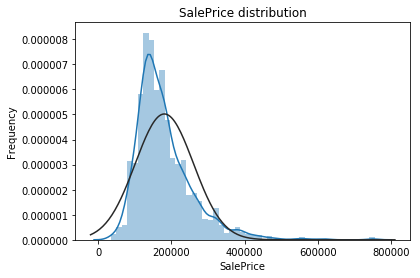

In [20]:
# plot the distribution using histogram
sns.distplot(train['SalePrice'],fit=norm)
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

Skewness:1.8812964895244009
Kurtosis:6.523066888485879


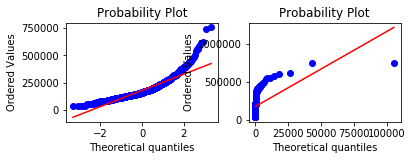

In [21]:
# the distribution is right skewed let's calculate the krewness and kurtosis
print("Skewness:" +str(train['SalePrice'].skew()))
print("Kurtosis:" +str(train['SalePrice'].kurt()))
# drew the qq-plot
plt.figure(1)
plt.subplot(221)
res1 = stats.probplot(train['SalePrice'],dist=norm, plot=plt)
plt.subplot(222)
res2 = stats.probplot(train['SalePrice'], dist=stats.lognorm,sparams=(3.5,),plot=plt)
plt.show()

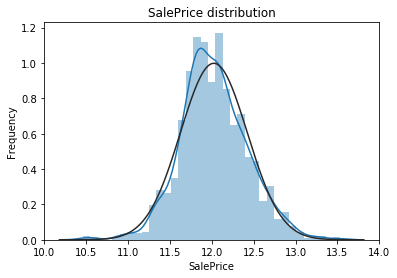

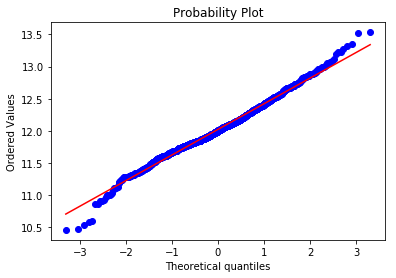

In [22]:
# since I apply some non-linear regression later, which don't need normalization, I made a copy for the data
train_1=train.copy()
# apply log-tranfrom(function: log(1+x)) to transform the sale price data to be close to normal distribution
# log transform the target
train["SalePrice"] = np.log1p(train["SalePrice"])
# check the transformed data
sns.distplot(train['SalePrice'],fit=norm)
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
# draw the qq-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()
# after the transformation, the sale price is close to normal distribution

In [23]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
all_data[numeric_feats].skew()

1stFlrSF          1.257933
2ndFlrSF          0.861999
3SsnPorch        11.377932
BedroomAbvGr      0.326736
BsmtFinSF1        0.981149
BsmtFinSF2        4.146636
BsmtFullBath      0.622735
BsmtHalfBath      3.932018
BsmtUnfSF         0.920161
EnclosedPorch     4.004404
Fireplaces        0.725651
FullBath          0.165599
GarageArea        0.216968
GarageCars       -0.219410
GarageYrBlt      -3.906642
GrLivArea         1.069300
HalfBath          0.697024
KitchenAbvGr      4.302763
LotArea          13.116240
LotFrontage       1.032139
LowQualFinSF     12.090757
MSSubClass        1.375838
MasVnrArea        2.597083
MiscVal          21.950962
MoSold            0.197447
OpenPorchSF       2.530660
OverallCond       0.569607
OverallQual       0.189688
PoolArea         17.697766
ScreenPorch       3.947131
TotRmsAbvGrd      0.749618
TotalBsmtSF       0.672097
WoodDeckSF        1.845741
YearBuilt        -0.599503
YearRemodAdd     -0.450365
YrSold            0.132064
dtype: float64

Some columns have extremely high value of skewness. Most value of PoolArea is zero.It seems not to help with my later 
analysis, so I will delete.

In [24]:
#box cox transform skewed numeric features:
# box cox transform skewed feature the data must be positive, but my data contains a lot of zero numbers
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 1]
skewed_feats = skewed_feats.index
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])
all_data[numeric_feats].skew()
# skewness of those numeric has been reduced(although some number still have high skewness, but this might
# not affect my analysis I will leave like this and see how my models' performance will be)

1stFlrSF          1.257933
2ndFlrSF          0.861999
3SsnPorch         8.826656
BedroomAbvGr      0.326736
BsmtFinSF1        0.981149
BsmtFinSF2        2.462526
BsmtFullBath      0.622735
BsmtHalfBath      3.775149
BsmtUnfSF         0.920161
EnclosedPorch     1.960960
Fireplaces        0.725651
FullBath          0.165599
GarageArea        0.216968
GarageCars       -0.219410
GarageYrBlt      -3.906642
GrLivArea        -0.022062
HalfBath          0.697024
KitchenAbvGr      3.520694
LotArea          -0.532920
LotFrontage      -0.909888
LowQualFinSF      8.559041
MSSubClass        0.246056
MasVnrArea        0.521254
MiscVal           5.214687
MoSold            0.197447
OpenPorchSF      -0.041559
OverallCond       0.569607
OverallQual       0.189688
PoolArea         15.631314
ScreenPorch       2.946085
TotRmsAbvGrd      0.749618
TotalBsmtSF       0.672097
WoodDeckSF        0.159605
YearBuilt        -0.599503
YearRemodAdd     -0.450365
YrSold            0.132064
dtype: float64

In [25]:
# In case some categorical has too many unique values, I will check with the unique values first
all_data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Alley             3
BldgType          5
BsmtCond          4
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
BsmtQual          5
CentralAir        2
Condition1        9
Condition2        8
Electrical        5
ExterCond         5
ExterQual         4
Exterior1st      15
Exterior2nd      16
Fence             5
FireplaceQu       6
Foundation        6
Functional        7
GarageCond        6
GarageFinish      4
GarageQual        6
GarageType        7
Heating           6
HeatingQC         5
HouseStyle        8
KitchenQual       4
LandContour       4
LandSlope         3
LotConfig         5
LotShape          4
MSZoning          5
MasVnrType        4
MiscFeature       5
Neighborhood     25
PavedDrive        3
PoolQC            4
RoofMatl          7
RoofStyle         6
SaleCondition     6
SaleType          9
Street            2
Utilities         2
dtype: int64

In [26]:
# do one-hot encoding for those categorical data
all_data = pd.get_dummies(all_data)

In [27]:
all_data.select_dtypes('object').count()

Series([], dtype: int64)

Models

Improve model performance: feature engineering

Note: different way of data transformation can change the model performance dramatically(I also tried box cox transformation to transform data(not in this code(I think box cox overtransform certain features and can't deal with "0")), the performance of lasso and ridge change dramatically.)

In [28]:
# import libraries
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

In [29]:
# train test split
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y_train= train.SalePrice.values

In [30]:
# define a cross validation
n_folds=5
def rmse_CV(model):
#     create a shuffle for the cross validation
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(X_train)
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

Model 1 Linear Regression

In [31]:
# build linear regression model
model_linear = LinearRegression()
model_linear.fit(X_train,y_train)
test_prediction = model_linear.predict(X_test)
train_prediction = model_linear.predict(X_train)
# print the score for the linear regression model
score_linear=rmse_CV(model_linear)
print("RMSE for linear regression: {:.4f}".format(score_linear.mean()))

RMSE for linear regression: 0.1260


Model 2 Ridge Regression

Best rmse is : 0.1131


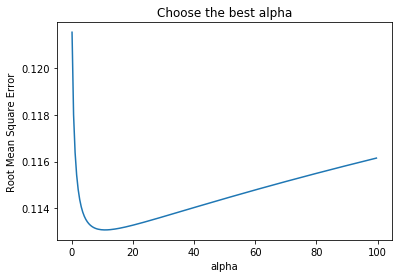

In [32]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model_ridge= Ridge()
# alpha is a very important parameter in ridge regression, here I will do a parameter tuning and test the best alpha
alphas = np.arange(0.1, 100, 0.5)
cv_ridge=[]
for a in alphas:
    cv_ridge.append(rmse_CV(Ridge(alpha = a)).mean())
cv_ridge = pd.Series(cv_ridge, index = alphas)
# plot the rmse with different alpha and print the best performance alpha 
cv_ridge.plot(title = "Choose the best alpha")
plt.xlabel("alpha")
plt.ylabel("Root Mean Square Error")
print("Best rmse is : {:.4f}".format(cv_ridge.min()))

In [33]:
# the best alpha
# while alpha=11.1, ridge regression have the best performance
cv_ridge[cv_ridge==cv_ridge.min()].index

Float64Index([11.1], dtype='float64')

In [34]:
# also, use ridgecv to choose the tuning parameter alpha
# ？？？？（did I just do double Cross-validation??）why this alpha so different with the analysis above?!
alphas = 10**np.linspace(10,-2,100)*0.5
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_
score_ridgecv=rmse_CV(ridgecv)
print("RMSE for ridgecv: {:.4f}".format(score_ridgecv.mean()))
# ridge cv didn't choose the best alpha for the least RMSE ????

RMSE for ridgecv: 0.1183


Model 3: Lasso Regression

I tried the following code using different alpha to plot RMSE, it doesn't work. Instead, I use cross-validation to choose the tuning parameter alpha.

model_lasso = Lasso(random_state=0)
alphas = np.arange(0.0001,0.3,0.00001)
cv_lasso=[]
for a in alphas:
    cv_lasso.append(rmse_CV(Lasso(alpha = a)).mean())
cv_lasso = pd.Series(cv_lasso, index = alphas)
#plot the rmse with different alpha and print the best performance alpha 
cv_lasso.plot(title = "Choose the best alpha")
plt.xlabel("alpha")
plt.ylabel("Root Mean Square Error")
print("Best rmse is : {:.4f}".format(cv_lasso.min()))

In [35]:
lasso = Lasso(max_iter = 10000, normalize = True)
model_lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
model_lassocv.fit(X_train, y_train)
score_lasso=rmse_CV(model_lassocv)
print("RMSE for lasso regression: {:.4f}".format(score_lasso.mean()))

RMSE for lasso regression: 0.1102


In [36]:
# lasso regression can be used to select important feature， let's see how many features lasso picks
lasso_coef = model_lassocv.coef_
print('lasso regression choose '+ str(np.count_nonzero(lasso_coef))+' features')

lasso regression choose 114 features


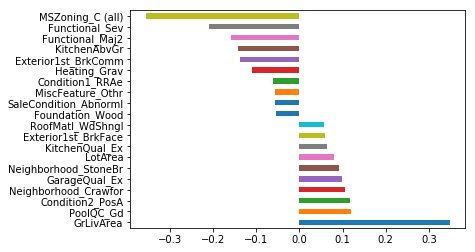

In [37]:
coef=pd.Series(lasso_coef,index=X_train.columns)
coef_head=coef[lasso_coef!=0].sort_values(ascending=False).head(10)
coef_tail=coef[lasso_coef!=0].sort_values(ascending=False).tail(10)
coef_plt=pd.concat([coef_head,coef_tail])
coef_plt.plot(kind='barh')

Above models are regularized linear regression model, the lasso regression performs pretty well.And from lasso regression, the most related feature is GrLivArea(Above grade (ground) living area square feet)
Let's do some ensemble learning.

Model 4: Gradient boosting

Reference:https://explained.ai/gradient-boosting/index.html

Parameter tuning is essential here
Here I choose learning rate and estimators to do the parameter tuning

In [38]:
# from the parameter tuning below I decide the learning_rate is 0.1
from sklearn import ensemble

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.1, 'loss': 'huber'}
model_gbm = ensemble.GradientBoostingRegressor(**params)
# print the score for the Gradient Boosting model
score_gbm=rmse_CV(model_gbm)
print("RMSE for Gradient Boosting: {:.4f}".format(score_gbm.mean()))

RMSE for Gradient Boosting: 0.1210


In [39]:
model_gbm_tuning= ensemble.GradientBoostingRegressor()
# alpha is a very important parameter in ridge regression, here I will do a parameter tuning and test the best alpha
learning_rate = [0.001,0.005,0.01,0.05,0.1,0.5]
cv_gbm_tuning=[]
for l in learning_rate:
    cv_gbm_tuning.append(rmse_CV(ensemble.GradientBoostingRegressor(learning_rate =l)).mean())

In [40]:
lrate_gbm_tuning=pd.DataFrame({'learning rate':learning_rate,'scoring':cv_gbm_tuning})
lrate_gbm_tuning.loc[lrate_gbm_tuning['scoring'].idxmin()]

learning rate    0.100000
scoring          0.121407
Name: 4, dtype: float64

Linear regression model conclusion:
from the above analysis, the lasso regression has the best performance(lowest rmse)

Now let's dive into some non-linear regression analysis and see how they performs

Model 5 Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor
model_random = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
# print the score for the Random Forest model
score_random=rmse_CV(model_random)
print("RMSE for random forest: {:.4f}".format(score_random.mean()))
print("")

RMSE for random forest: 0.2337



In [42]:
# # Random Hyperparameter Grid for random Forest
# from sklearn.model_selection import RandomizedSearchCV

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]

# param_grid = {'bootstrap': [True],
#               'max_depth': [80, 100],
#               'max_features': [2, 3],
#               'min_samples_leaf': [3, 4, 5],
#               'min_samples_split': [8, 10, 12],
#               'n_estimators': [100, 200, 300, 1000]}
# grid_search = GridSearchCV(estimator = model_random, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 2)
# grid_search.fit(X_train, y_train)
# grid_search.best_params_

In [43]:
# best_grid = grid_search.best_estimator_
# score_best_grid=rmse_CV(best_grid)
# print("RMSE for random forest: {:.4f}".format(score_best_grid.mean()))
# RMSE for random forest is 0.2114

The performance of random forest, however, is very very bad, though there are slight improvement after the grid search

I won't use it in my later analysis

Model 6: Adaboost

In [45]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
# Tuning the parameter
param_dist = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

pre_gs_inst = RandomizedSearchCV(AdaBoostRegressor(),
 param_distributions = param_dist,
 cv=3,
 n_iter = 10,
 n_jobs=-1)

pre_gs_inst.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [50, 100], 'learning_rate': [0.01, 0.05, 0.1, 0.3, 1], 'loss': ['linear', 'square', 'exponential']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [46]:
pre_gs_inst.best_params_

{'n_estimators': 100, 'loss': 'square', 'learning_rate': 1}

In [50]:
model_ada=AdaBoostRegressor(n_estimators = 100, loss = 'square', learning_rate = 1)
score_ada=rmse_CV(model_ada)
print("RMSE for adaboost regressor: {:.4f}".format(score_ada.mean()))

RMSE for adaboost regressor: 0.1664


In [51]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [54]:
model_lassocv.fit(X_train,y_train)
lasso_train_pred=model_lassocv.predict(X_train)
lasso_pred=np.expm1(model_lassocv.predict(X_test))
print(rmsle(y_train, lasso_train_pred))

0.0964655609601797


In [55]:
model_gbm.fit(X_train,y_train)
gbm_train_pred = model_gbm.predict(X_train)
gbm_pred = np.expm1(model_gbm.predict(X_test))
print(rmsle(y_train, gbm_train_pred))

0.033905458801793444


In [59]:
print('RMSLE score on train data:')
print(rmsle(y_train,lasso_train_pred*0.4 + gbm_train_pred*0.6))

RMSLE score on train data:
0.05395092193973729


In [60]:
y_pred=lasso_pred*0.4+gbm_pred*0.6